# Random Forest Regression

## Purpose of Dielectric Test

Normally reators are operated at the rated operating voltage. During its operation it is exposed to various transient over voltage like power frequency over voltage (1.5XBIL, due to system over voltage), Lighting impulse (due to lighting), switching impulse (due to switching off). To avoidinsulation failure, insulation designed to consider all these aspects. Dielectric test confirm the capablity of the insulation to withstand these transient overvoltage which is subjected to the reactor during its service life.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'D:\kishan\Machine learning\Machine learning\02 Regression\6 Randam forest\Python\dielectric_test.csv')

In [3]:
dataset.head(4)

,operating_voltage,BIL(KV_RMS),power_freq_volt(KV_rms)
0,0.415,1.1,3
1,3.300,3.6,10
2,6.600,7.2,20
3,11.000,12.0,28


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

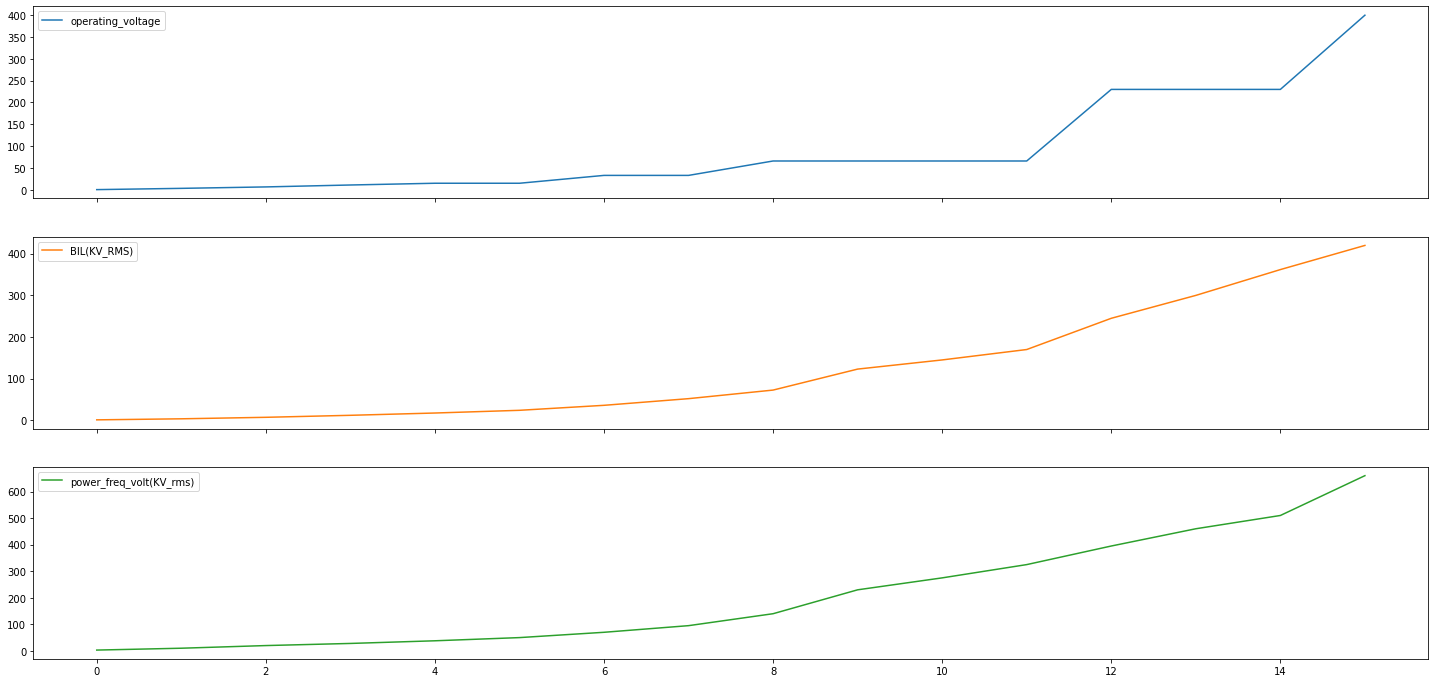

In [4]:
dataset.plot(subplots=True, figsize=(25,12))

According to the standards, the transfromers are made to meat maximum operating voltage, 

The transformer insulation levels and the insulation test to be applied according to  is shown in the below table.

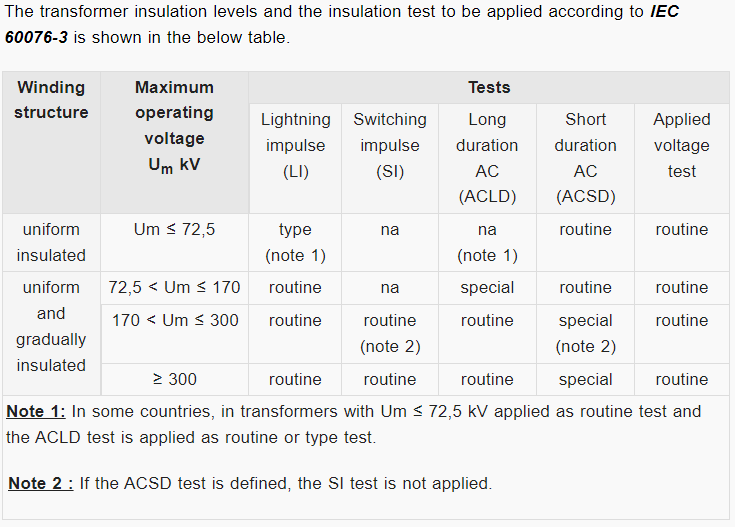

In case of a transformer with one or more than one gradual insulation, if foreseen by the induced voltage test, the switching impulse test isdetermined according to the maximum  voltage winding.

The foreseen test voltage can not be reached in. In this case, the ratio between the tap changer’s optimum tap position and the windings shall be such arranged that, the lowest  voltage winding reaches the most appropriate value. 

If chopped wave is requested during , the peak value of the chopped wave is 1.1 times the full wave value (10% higher). For transformers with the high voltage winding , the lightning impulse (LI) test is a routine test for all windings of the transformer.

Source: Electrical Engineering Portal

In [6]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [7]:
X

array([[  1.1],
       [  3.6],
       [  7.2],
       [ 12. ],
       [ 17.5],
       [ 24. ],
       [ 36. ],
       [ 52. ],
       [ 72.6],
       [123. ],
       [145. ],
       [170. ],
       [245. ],
       [300. ],
       [362. ],
       [420. ]])

In [8]:
y

array([  3,  10,  20,  28,  38,  50,  70,  95, 140, 230, 275, 325, 395,
       460, 510, 660], dtype=int64)

## Training the Random Forest Regression model on the whole dataset

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [10]:
regressor.predict([[6.5]])

array([15.])

## Visualising the Random Forest Regression results (higher resolution)

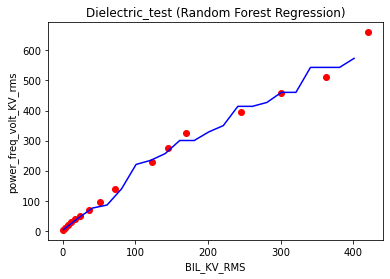

In [11]:
X_grid = np.arange(min(X), max(X), 20)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Dielectric_test (Random Forest Regression)')
plt.xlabel('BIL_KV_RMS')
plt.ylabel('power_freq_volt_KV_rms')
plt.show()